In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [11]:
points_n = 200
clusters_n = 3
iteration_n = 100

In [12]:
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

In [13]:
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [15]:
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

In [18]:
means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))

In [21]:
new_centroids = tf.concat(means, 0)
update_centroids = tf.assign(centroids, new_centroids)

In [23]:
init = tf.global_variables_initializer()

In [25]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])

centroids
 [[ 8.01071511  3.27369561]
 [ 4.49315965  8.00737359]
 [ 2.62625523  3.2866415 ]]


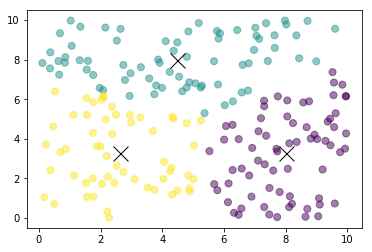

In [26]:
print("centroids" + "\n", centroid_values)

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()